# Mobile Applications: User Segmentation Based on Behavior.

**Objective:** 

To conduct a general analysis of users, segment them, identify the target segment for the "Unnecessary Stuff" application and to provide recommendations.

**Tasks:** 
 
- Perform exploratory data analysis:
  - calculate the retention rate.
  - find the time spent using the application.
  - analyze the frequency of actions in the application.
  - determine the conversion rate of the target action.
  - segment users based on their actions and conduct an analysis.
- Test hypotheses:
  - Do users coming from Yandex and Google demonstrate different conversion rates?
  - Do users who access the application in the evening perform more actions than those who access it during the day?

**Data Description:**

The dataset contains data about events that occurred in the mobile application "Unnecessary Stuff". In this application, users sell their unwanted items by posting them on the bulletin board.

The dataset includes data about users who performed actions in the application for the first time after October 7, 2019.

The **mobile_dataset.csv** dataset contains the following columns:

`event.time` - the time of the event

`event.name` - the name of the event

`user.id` - user identifier

The **mobile_sources.csv** dataset contains the following columns:

`userId` - user identifier

`source` - the source from which the user installed the application

Events:

`advert_open` - opening an ad card

`photos_show` - viewing photos in an ad

`tips_show` - the user viewed recommended ads

`tips_click` - the user clicked on a recommended ad

`contacts_show` and `show_contacts` - the user clicked the "show contact number" button on the ad card

`contacts_call` - the user made a phone call to the phone number on the ad card

`map` - the user opened a map of posted ads

`search_1` to `search_7` - different events related to site search

`favorites_add` - adding an ad to favorites

## Data examination

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

import seaborn as sns


from scipy import stats as st
import numpy as np
import math as mth

In [302]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [303]:
mobile_sourсes.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [304]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [305]:
mobile_dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [306]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [307]:
# min date in dataset
mobile_dataset['event.time'].min()

'2019-10-07 00:00:00.431357'

In [308]:
# max date in dataset
mobile_dataset['event.time'].max()

'2019-11-03 23:58:12.532487'

## Data preprocessing

### Changing the names of the columns, converting the data to the desired type

In [309]:
# changing the names of the columns
mobile_sourсes.columns = ['user_id', 'source']
mobile_dataset.columns = mobile_dataset.columns.str.lower().str.replace('.', '_', regex=True)

In [310]:
# converting data to the desired type
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])

In [311]:
mobile_dataset

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [312]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Checking unique values in the "source" and "event name" columns

In [313]:
mobile_sourсes['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [314]:
mobile_dataset['event_name'].unique().tolist()

['advert_open',
 'tips_show',
 'map',
 'contacts_show',
 'search_4',
 'search_5',
 'tips_click',
 'photos_show',
 'search_1',
 'search_2',
 'search_3',
 'favorites_add',
 'contacts_call',
 'search_6',
 'search_7',
 'show_contacts']

In [315]:
# standardizing names of users who clicked the "show contact number" button
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace('show_contacts', 'contacts_show')

### Checking for missing values, duplicates

In [316]:
# checking for missing values
mobile_sourсes.isna().sum()

user_id    0
source     0
dtype: int64

In [317]:
# checking for missing values
mobile_dataset.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

In [318]:
# checking for duplicates
mobile_sourсes.duplicated().sum()

0

In [319]:
# checking for duplicates
mobile_dataset.duplicated().sum()

0

In [320]:
# joining columns
mobile_dataset = mobile_dataset.merge(mobile_sourсes, left_on='user_id', right_on='user_id')

In [321]:
# changing datatype
mobile_dataset['event_date'] = mobile_dataset['event_time'].astype('datetime64[D]')

In [322]:
mobile_dataset.head()

,event_time,event_name,user_id,source,event_date
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07


Conclusion:

In the preprocessing step, the data type was changed, column names were renamed, and there are no missing values or duplicates.

## Exploratory Data Analysis

### Data exploration and validation

In [323]:
# total events
mobile_dataset.shape[0]

74197

In [324]:
# unique number of users
mobile_dataset['user_id'].nunique()

4293

In [325]:
# average number of events for each user
round(mobile_dataset.shape[0]/mobile_dataset['user_id'].nunique())

17

In [326]:
# number of events on a certain date
mobile_dataset.groupby('event_date').agg({'event_name': 'count'})

,event_name
event_date,
2019-10-07,2545
2019-10-08,2499
2019-10-09,2027
2019-10-10,2243
2019-10-11,2030
2019-10-12,1843
2019-10-13,2635
2019-10-14,3034
2019-10-15,2722


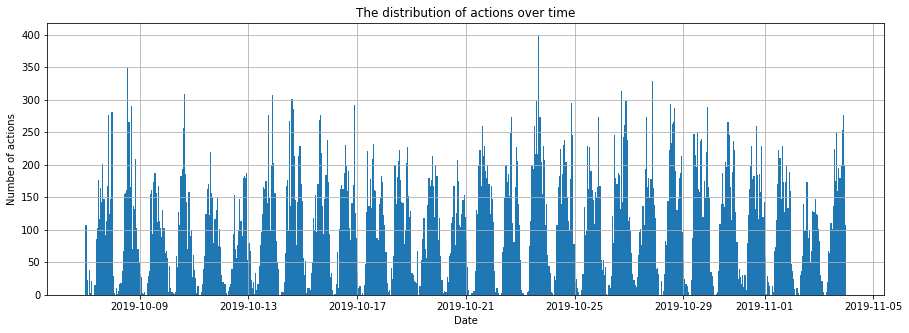

In [392]:
# the number of bins in the histogram - 28 (days) multiplied by 24 (hours)
mobile_dataset['event_time'].hist(bins=28*24, figsize =(15,5))
plt.title('The distribution of actions over time')
plt.ylabel("Number of actions")
plt.xlabel("Date")
plt.show()

We observe the distribution of actions over time, specifically capturing the patterns based on days and hours. We can see 28 days and the distribution of hours within a day. It looks logical - the frequency of actions decreases towards the night.

### Retention rate

Creating user profiles

In [328]:

def get_profiles(mobile_dataset):

    profiles = (
        mobile_dataset.sort_values(by=['user_id', 'event_time']) # sort sessions by user ID & event_time
        .groupby('user_id')
        .agg({'event_time': 'first', 'source': 'first'}) # group by user ID and find first values of event_time & source
        .rename(columns={'event_time': 'first_timestamp'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_timestamp'].dt.date #.astype('datetime64[D]')
    return profiles

profiles = get_profiles(mobile_dataset)

In [329]:
profiles

,user_id,first_timestamp,source,dt
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,yandex,2019-10-19
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,yandex,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,google,2019-10-18
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,yandex,2019-10-25
...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27.414960,yandex,2019-10-13
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49.997044,yandex,2019-10-07
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35.199237,google,2019-10-23
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33.867145,yandex,2019-10-21


In [330]:
def get_retention(
    profiles, mobile_dataset, observation_date, horizon_days, dimensions=[], ignore_horizon=False):

    # exclude users who haven't reached the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # join mobile_dataset to profiles based on user_id
    result_raw = result_raw.merge(
        mobile_dataset[['user_id', 'event_time']], on='user_id', how='left')
    
    # calculate lifetime for each session
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_timestamp']).dt.days

    # group by cohort if dimensions are not specified
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    # calculate retention
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique')
    
    # cohort sizes
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'}))
    
    # join retention table with cohort sizes
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left').fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # function to group the table by desired dimensions
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # get the retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
  
    # return the raw data, retention table, and retention dynamics table
    # raw data can be useful for troubleshooting calculation errors
    return result_raw, result_grouped, result_in_time

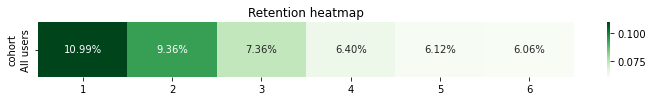

In [331]:
result_raw, retention, retention_in_time = get_retention(
    profiles, mobile_dataset, datetime(2019, 11, 3).date(), 7)

retention

# heatmap
plt.figure(figsize=(12, 1))
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # remove cohort size and the first day of retention(100%) columns
    cmap='Greens',
    annot=True, 
    fmt='.2%')

plt.title('Retention heatmap')
plt.show()

On the second day, user retention stands at 11% and dips to 6% by the seventh day.

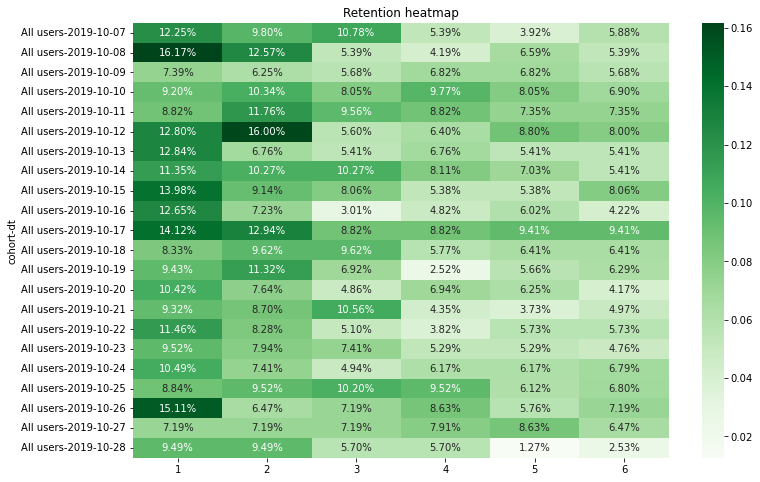

In [332]:
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_in_time.drop(columns=['cohort_size', 0]),  # remove cohort size column
    cmap='Greens',
    annot=True, 
    fmt='.2%')

plt.title('Retention heatmap')
plt.show()

The best retention rate by days is on October 17th, and the worst is on October 28th. It is possible that different advertising campaigns were conducted on these dates, resulting in the campaign reaching the target audience at a specific time, while not reaching it at another time.

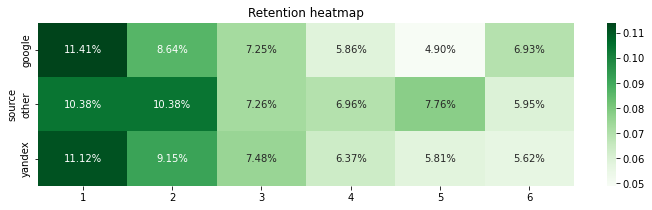

In [333]:
result_raw, retention, retention_in_time = get_retention(
    profiles, mobile_dataset, datetime(2019, 11, 3).date(), 7, dimensions=['source'])

retention

# heatmap
plt.figure(figsize=(12, 3))
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # remove cohort size column
    cmap='Greens',
    annot=True, 
    fmt='.2%')

plt.title('Retention heatmap')
plt.show()

The retention rate by acquisition sources does not differ significantly.

### Analysis of users based on the time spent in the application

In [334]:
# sorting is needed, otherwise the next steps may output incorrect results
mobile_dataset_sessions = mobile_dataset.sort_values(['user_id', 'event_time']) 

# timestamp diff in sec
diff_timestamp = mobile_dataset_sessions.groupby('user_id').agg({'event_time' : 'diff'})
diff_timestamp

,event_time
2171,NaT
2172,0 days 00:00:45.063550
2173,0 days 00:00:34.669580
2174,0 days 00:02:15.012972
2175,0 days 00:02:10.182041
...,...
19048,0 days 00:00:27.886483
19049,0 days 00:00:33.940425
19050,0 days 00:15:43.032080
19051,0 days 00:00:37.270657


For the "Unnecessary Stuff" application, we will consider a session duration of 30 minutes, which is close to the standard benchmark. Users may spend more time in such applications, especially when searching for products.
If more than 30 minutes have passed between user actions, the next action will be considered as part of a new session.  

In [335]:
# indentify diff 30 min 
new_session = (diff_timestamp > pd.Timedelta('30Min'))

#add user_id column by the index
new_session = new_session.merge(mobile_dataset_sessions[['user_id']], left_index=True, right_index=True)

# create new session for every user with cumulative sum 
mobile_dataset_sessions['session_id'] = (
    (new_session.groupby('user_id').cumsum() + 1).astype(int))

In [336]:
new_session

,event_time,user_id
2171,False,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
2172,False,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
2173,False,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
2174,False,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
2175,False,0001b1d5-b74a-4cbf-aeb0-7df5947bf349
...,...,...
19048,False,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
19049,False,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
19050,False,fffb9e79-b927-4dbb-9b48-7fd09b23a62b
19051,False,fffb9e79-b927-4dbb-9b48-7fd09b23a62b


In [337]:
# number of sessions for each user (the code identifies the highest session ID associated with each user)
sessions_grouped = (mobile_dataset_sessions.groupby('user_id')
.agg({'session_id': 'max'}).reset_index())
mobile_dataset_sessions

,event_time,event_name,user_id,source,event_date,session_id
2171,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2172,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2173,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2174,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2175,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
...,...,...,...,...,...,...
19048,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19049,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19050,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19051,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30


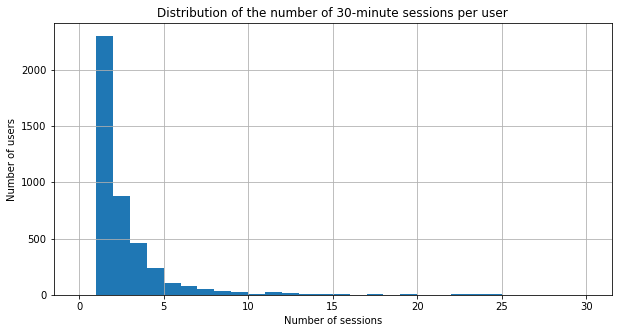

In [338]:
sessions_grouped.sort_values(by='session_id').hist(range=(0,30), bins=30, figsize =(10,5))
plt.title('Distribution of the number of 30-minute sessions per user')
plt.xlabel('Number of sessions')
plt.ylabel('Number of users')
plt.show()

In [339]:
sessions_grouped.describe()

,session_id
count,4293.000000
mean,2.415094
std,3.536466
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,99.000000


On average, users have two 30-minute sessions, while the median value indicates one 30-minute session.

In [340]:
mobile_dataset = mobile_dataset.sort_values(['user_id', 'event_time'])

In [341]:
# create session_id
mobile_dataset = mobile_dataset.sort_values(['user_id', 'event_time']).join(mobile_dataset_sessions.set_index('event_time')['session_id'], on='event_time')

In [342]:
mobile_dataset

,event_time,event_name,user_id,source,event_date,session_id
2171,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2172,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2173,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2174,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2175,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
...,...,...,...,...,...,...
19048,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19049,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19050,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19051,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30


In [343]:
# the time differences between the last action in each session and the first action in the subsequent session
time_diff = ((mobile_dataset.sort_values(['user_id', 'event_time'])['event_time']
             .shift(-1) - mobile_dataset.sort_values(['user_id', 'event_time'])['event_time'])
             .fillna(pd.Timedelta(seconds=0)))

# exclude actions that occurred within the same session
time_diff = time_diff[time_diff >= pd.Timedelta('30Min')]

In [344]:
time_diff.median()

Timedelta('0 days 23:38:51.720235500')

We see that the average time between sessions is nearly one day.

In [345]:
# find a session diration 
session_duration = (mobile_dataset.sort_values(['user_id', 'event_time'])
                   .groupby(['user_id', 'session_id'])['event_time']
                   .apply(lambda x: (x.max() - x.min())))

session_duration = session_duration.reset_index()

In [346]:
session_duration

,user_id,session_id,event_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,0 days 00:09:55.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,0 days 00:08:27.385985
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,0 days 00:14:59.272096
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,0 days 00:12:38.171767
4,00157779-810c-4498-9e05-a1e9e3cedf93,1,0 days 00:25:20.787329
...,...,...,...
10363,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,26,0 days 00:00:00
10364,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,27,0 days 00:16:14.291817
10365,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,28,0 days 00:04:56.677281
10366,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,29,0 days 00:15:48.307055


In [347]:
session_duration['event_time'].median()

Timedelta('0 days 00:05:35.169711500')

The median session duration is 5 minutes.

In [348]:
# min session duration
session_duration['event_time'].min()

Timedelta('0 days 00:00:00')

In [349]:
# max session duration
session_duration['event_time'].max()

Timedelta('0 days 05:21:58.296302')

In [350]:
# number of zero-length sessions
session_duration.query('event_time == "00:00:00"')['event_time'].count()

2088

In [351]:
# number of > than 1 hour-length sessions
#session_duration.query('event_time > "01:00:00"')['event_time'].count()
long_sessions = session_duration[session_duration['event_time'] > pd.Timedelta(hours=1)]
long_sessions['event_time'].count()

335

The median session duration is 5 minutes, the longest session is over 5 hours, and 335 sessions are found to exceed an hour in duration. There aree 2,088 zero-length sessions, implying that users probably opened the app and immediately exited. 

### Analysis of users by action frequency

In [352]:
mobile_dataset

,event_time,event_name,user_id,source,event_date,session_id
2171,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2172,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2173,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2174,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
2175,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,1
...,...,...,...,...,...,...
19048,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19049,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19050,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30
19051,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30


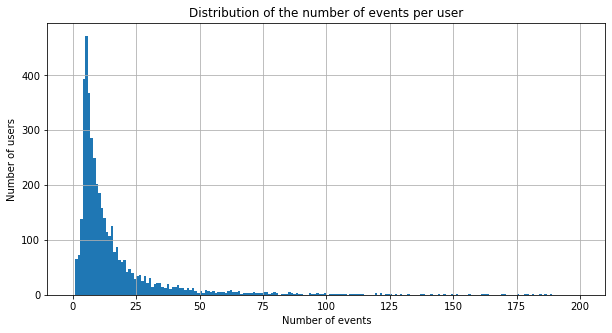

In [353]:
mobile_dataset.groupby('user_id').agg({'event_name': 'count'}).hist(range=(0,200), bins=200, figsize =(10,5))
plt.title('Distribution of the number of events per user')
plt.xlabel('Number of events')
plt.ylabel('Number of users')
plt.show()

In [354]:
mobile_dataset.groupby('user_id').agg({'event_name': 'count'}).describe()

,event_name
count,4293.000000
mean,17.283252
std,29.130677
min,1.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,478.000000


The average number of actions taken in the app per user is 17.3, with a median of 9.

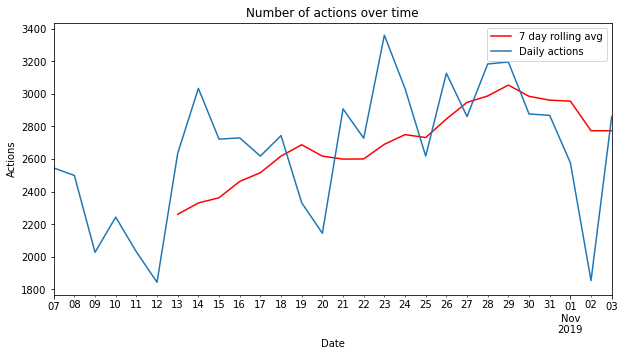

In [355]:
rolling_avg = mobile_dataset.groupby('event_date').agg({'event_name': 'count'}).rolling(7).mean()

rolling_avg.plot(color='r', figsize =(10,5))
sns.lineplot(data = mobile_dataset.groupby('event_date').agg({'event_name': 'count'}), label='label1')

plt.title('Number of actions over time')
plt.ylabel("Actions")
plt.xlabel("Date")
plt.legend(['7 day rolling avg', 'Daily actions'])
plt.show()

Typically, users perform fewer actions on weekends.

### Conversion rate

In [356]:
# getting a table with target action - contacts_show
calls = mobile_dataset.query('event_name == "contacts_show"')
calls

,event_time,event_name,user_id,source,event_date,session_id
42975,2019-10-20 19:17:18.659799,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-20,2
42979,2019-10-20 19:23:11.839947,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-20,2
42981,2019-10-20 19:30:31.912891,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-20,2
42985,2019-10-20 20:04:53.349091,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-20,2
43003,2019-10-29 21:26:40.258472,contacts_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,2019-10-29,4
...,...,...,...,...,...,...
19029,2019-11-03 14:38:51.134084,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,29
19031,2019-11-03 14:41:24.780546,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,29
19033,2019-11-03 14:42:26.444553,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,29
19044,2019-11-03 15:48:05.420247,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,30


In [357]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):

    # exclude users who haven't reached the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # find the date and time of the target action
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index())

     # add "purchases" data into the profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_time']], on='user_id', how='left')

    # calculate lifetime for each "purchase"
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_timestamp']
    ).dt.days

    # group by cohort if dimensions are not specified
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    # function to group the table by desired dimensions
    def group_by_dimensions(df, dims, horizon_days):

        # build a "triangular" conversion table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique')

        # calculate cumulative sums for each row
        result = result.fillna(0).cumsum(axis = 1)

        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))

        # merge cohort size and conversion tables
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # divide each "cell" in the row by the cohort size
        result = result.div(result['cohort_size'], axis=0)

        # exclude lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes
        return result

    # get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = [] 
    
    # get the conversion dynamics table
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # returning the resulting tables and raw data
    return result_raw, result_grouped, result_in_time

In [358]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, calls, datetime(2019, 11, 3).date(), 14)

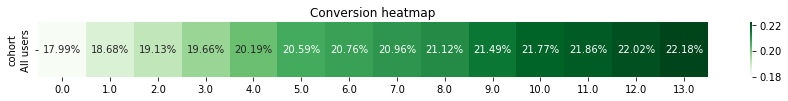

In [359]:
plt.figure(figsize=(15, 1))
sns.heatmap(conversion.drop(columns=['cohort_size']), cmap='Greens', annot=True, fmt='.2%')
plt.title('Conversion heatmap')
plt.show()

The conversion rate for all users amounts to 22.2% over a two-week period.
This means 22.2% of all users reach the target action within a two-week horizon.

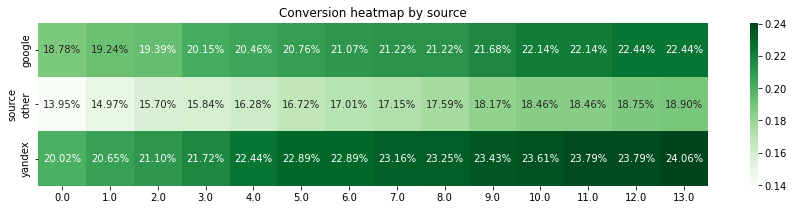

In [360]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, calls, datetime(2019, 11, 3).date(), 14, dimensions=['source'])

plt.figure(figsize=(15, 3))
sns.heatmap(conversion.drop(columns=['cohort_size']), cmap='Greens', annot=True, fmt='.2%')
plt.title('Conversion heatmap by source')
plt.show() 

The highest conversion rate is among Yandex users - 24.06%, Google is 22.44% and other acquisition sources are 18.9%.

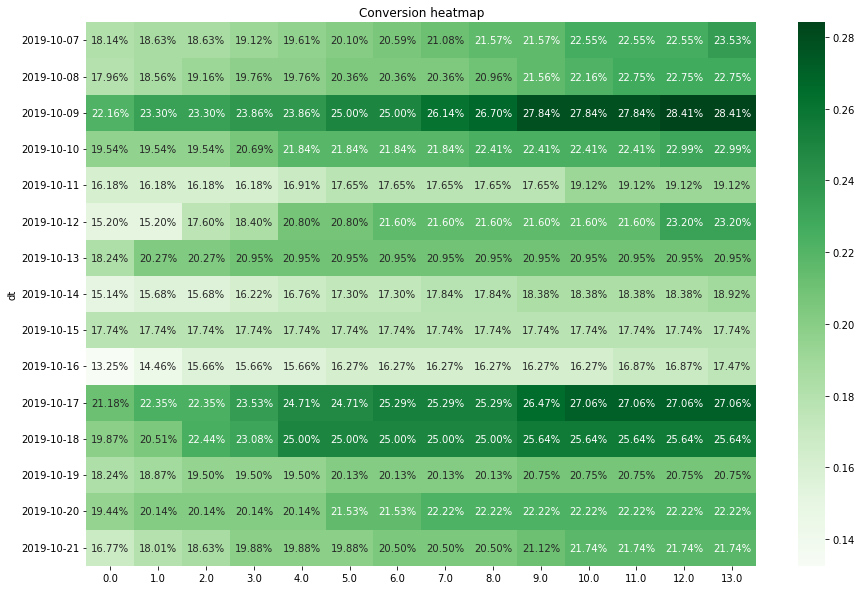

In [361]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, calls, datetime(2019, 11, 3).date(), 14)

plt.figure(figsize=(15, 10))
sns.heatmap(conversion_history.drop(columns=['cohort_size']), cmap='Greens', annot=True, fmt='.2%')
plt.title('Conversion heatmap')
plt.show() 

Notably high conversion rates were observed on October 9th (28.4%) and October 17th (27.1%). It's possible that notifications about promotions, bonuses, discounts, etc., were received on these dates.

### Acquisition sources

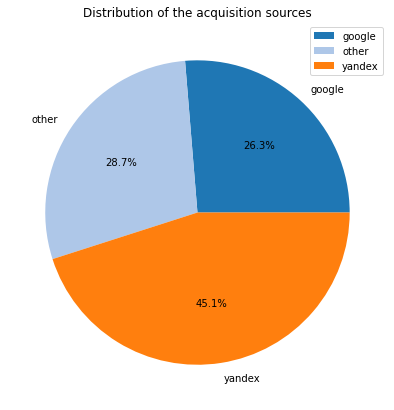

In [362]:
colors = plt.get_cmap('tab20').colors
profiles.groupby('source').agg({'user_id': 'nunique'}).plot(kind='pie', y='user_id', figsize =(7,7), colors=colors, autopct='%1.1f%%')
plt.title('Distribution of the acquisition sources')

# hide the axis lines and labels
plt.axis('off')
plt.show()

Yandex is the most popular acquisition source with 45.1% of users.

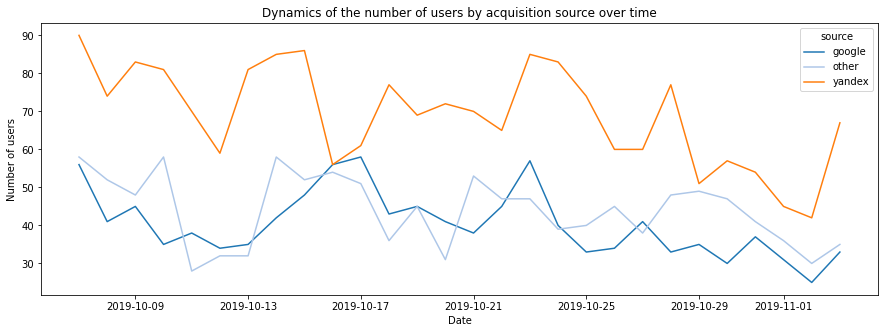

In [363]:
profiles.pivot_table(index='dt', columns='source', values='user_id', aggfunc='nunique').plot(color=colors, figsize=(15, 5))
plt.title('Dynamics of the number of users by acquisition source over time')
plt.ylabel("Number of users")
plt.xlabel("Date")
plt.show()

 Yandex continues to lead as an acquisition source for users over time.

Conclusion:

- The seven-day retention rate for users is 6% (11% on the second day).

- A session length was defined, which is 30 minutes. If there's more than a 30-minute gap between user actions, the subsequent action will be part of a new session. On average, there's nearly a full day between sessions. The median session length is 5 minutes. The longest session is over 5 hours, with 335 sessions exceeding an hour. There are 2088 instances of zero-length sessions, where the user likely just opened the app and then exited.

- The average number of actions taken in the app per user is 17.3, with a median of 9. Typically, users perform fewer actions on weekends.

- 22.2% of all users reach the target action within a two-week horizon. The highest conversion rate is among Yandex users - 24.06%. Notably high conversion rates were observed on October 9th (28.4%) and October 17th (27.1%). It's possible that notifications about promotions, bonuses, discounts, etc., were received on these dates.

- Yandex is the most popular source of user acquisition, accounting for 45.1% of users, followed by Google with 26.3%. The remaining 28.7% of users came from other acquisition sources.

##  Segmentation

### User segmentation

Let's divide the user sessions by the time of day.  We can consider 2 variants of division:

- from 0 to 6 hours - night, from 6 to 12 hours - morning, from 12 to 18 hours - afternoon, from 18 to 24 hours - evening.

- from 0 to 6 hours - night, from 6 to 12 hours - morning, from 12 to 16 hours - afternoon, from 16 to 24 hours - evening.

The second approach seems to align more closely with the internal clock of the modern human and fits with the rhythm of life, so we'll focus on that.

For each user, we will select the time of day in which they are most active and assign them to a segment - morning, afternoon, evening, night.

In [364]:
# add column with time of day
mobile_dataset['session_time'] = (
pd.cut(mobile_dataset['event_time'].dt.hour, bins=[0, 6, 11, 16, 23, 24], 
       labels=['night', 'morning', 'afternoon', 'evening', 'night'], include_lowest=True, ordered=False))

mobile_dataset = mobile_dataset.sort_values(by='event_time')

In [365]:
# transforming 'session_time' column into 4 columns with boolean values representing times of day
dummies_mobile_dataset = pd.get_dummies(mobile_dataset['session_time'])

# concatenation
result = pd.concat([mobile_dataset, dummies_mobile_dataset], axis=1)

# group by user and observe at what time of day each user is more active
result = (result.groupby('user_id')
          .agg({'afternoon': 'sum', 'evening': 'sum', 'morning': 'sum', 'night': 'sum'})
         .reset_index())

# change data type to int
result[['afternoon', 'evening', 'morning', 'night']] = (
    result[['afternoon', 'evening', 'morning', 'night']].astype('int64'))

# function to get the column name with the maximum value
def get_max_column(row):
    column_names = ['afternoon', 'evening', 'morning', 'night']
    max_col_index = np.argmax(row[1:])
    return column_names[max_col_index]

# apply function to each row
result['time_of_day_section'] = result.apply(get_max_column, axis=1)
result

,user_id,afternoon,evening,morning,night,time_of_day_section
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,9,18,8,0,evening
1,00157779-810c-4498-9e05-a1e9e3cedf93,0,48,23,0,evening
2,00463033-5717-4bf1-91b4-09183923b9df,10,0,0,0,afternoon
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0,26,0,6,evening
4,00551e79-152e-4441-9cf7-565d7eb04090,7,0,0,1,afternoon
...,...,...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,10,7,0,0,afternoon
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,0,7,0,0,evening
4290,ffcf50d9-293c-4254-8243-4890b030b238,0,0,2,0,morning
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,6,0,7,0,morning


In [366]:
# deleting columns
sections = result.drop(columns=['afternoon', 'evening', 'morning', 'night'])
# merge sections and mobile_dataset
mobile_dataset = mobile_dataset.merge(sections, on='user_id', how='left')

In [367]:
mobile_dataset.groupby('time_of_day_section')['user_id'].nunique()

time_of_day_section
afternoon    1529
evening      1767
morning       791
night         206
Name: user_id, dtype: int64

In [368]:
mobile_dataset['user_id'].nunique()

4293

### Ratention rate

In [369]:
profiles = profiles.merge(sections, on='user_id', how='left')

In [370]:
result_raw, retention, result_in_time = get_retention(
    profiles, mobile_dataset, datetime(2019, 11, 3).date(), 7, dimensions = ['time_of_day_section'])

retention

,cohort_size,0,1,2,3,4,5,6
time_of_day_section,,,,,,,,
afternoon,1286,1.0,0.098756,0.080093,0.073872,0.059876,0.060653,0.056765
evening,1445,1.0,0.125260,0.114879,0.082353,0.076125,0.063668,0.069896
morning,653,1.0,0.098009,0.081164,0.052067,0.044410,0.052067,0.049005
night,164,1.0,0.109756,0.060976,0.079268,0.067073,0.079268,0.054878


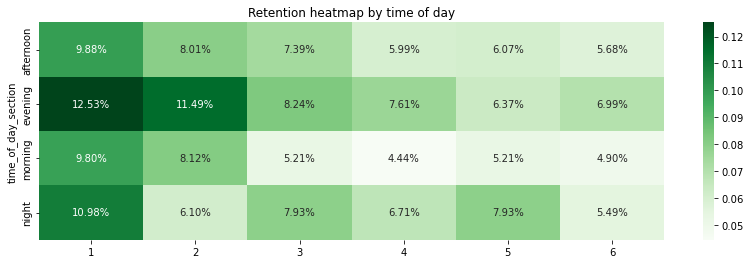

In [371]:
# heatmap
plt.figure(figsize=(14, 4))
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),  # remove cohort size column
    cmap='Greens',
    annot=True, 
    fmt='.2%')

plt.title('Retention heatmap by time of day')
plt.show()

- Based on the analysis, users who typically access the application in the evenings exhibit the highest retention rate.
- Morning users have the lowest retention rate.

### Which segments spend more time in the application

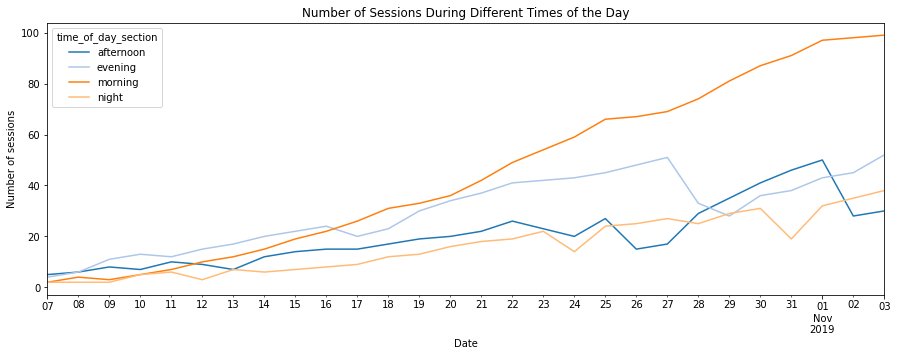

In [372]:
mobile_dataset.pivot_table(index='event_date', columns='time_of_day_section', values='session_id', aggfunc='max').plot(color=colors, figsize=(15, 5))
plt.title('Number of Sessions During Different Times of the Day')
plt.ylabel("Number of sessions")
plt.xlabel("Date")
plt.show()

Towards the end of the study, users who access the application in the morning spent more time on it compared to users who access it at night. At the beginning of the study, the highest number of sessions was observed among evening users.

### Which user segments perform more actions in the app

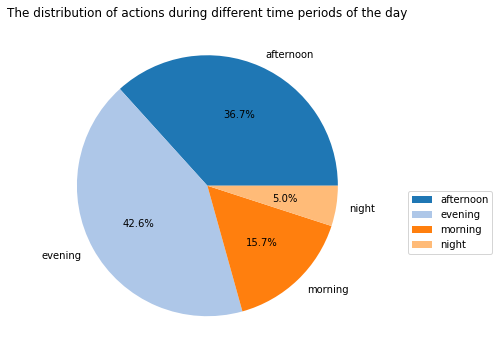

In [373]:
colors = plt.get_cmap('tab20').colors
mobile_dataset.groupby('time_of_day_section').agg({'event_name': 'count'}).plot(kind='pie', y='event_name', figsize =(6,6), colors=colors, autopct='%1.1f%%')
plt.title('The distribution of actions during different time periods of the day')

# hide the axis lines and labels
plt.axis('off')
# add a legend to the chart
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 0.5), ncol=1)
plt.show()

The majority of actions are performed by users accessing the application in the evening (42.6%) and during the day (36.7%), while the fewest actions are observed during nighttime (5%).

In [374]:
mobile_dataset.query('time_of_day_section == "morning"').groupby('user_id').agg({'event_name': 'count'}).describe()

,event_name
count,791.000000
mean,14.704172
std,24.800387
min,1.000000
25%,5.000000
50%,8.000000
75%,14.000000
max,400.000000


In [375]:
result = mobile_dataset.groupby(['time_of_day_section', 'user_id'])['event_name'].count().reset_index()
result

,time_of_day_section,user_id,event_name
0,afternoon,00463033-5717-4bf1-91b4-09183923b9df,10
1,afternoon,00551e79-152e-4441-9cf7-565d7eb04090,8
2,afternoon,00554293-7e00-4122-b898-4e892c4a7c53,11
3,afternoon,007d031d-5018-4e02-b7ee-72a30609173f,9
4,afternoon,00a93a72-3bbc-4ee7-8a81-7134f45ae009,15
...,...,...,...
4288,night,fa96b2ab-414c-4838-ba30-4b60336f1f3b,11
4289,night,fae55b3f-364d-45c9-aa8b-c9930fabe804,5
4290,night,fd9b3591-9dd3-48c4-804d-cbcbb9a3b8da,13
4291,night,fdf57c9e-863a-4057-8b4a-782494f7c107,9


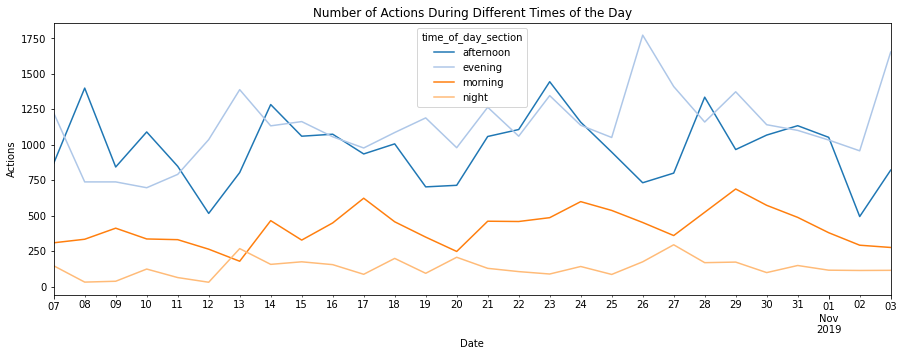

In [376]:
mobile_dataset.pivot_table(index='event_date', columns='time_of_day_section', values='event_name', aggfunc='count').plot(color=colors, figsize=(15, 5))
plt.title('Number of Actions During Different Times of the Day')
plt.ylabel("Actions")
plt.xlabel("Date")
plt.show()

The overall trend remains consistent: users accessing the application in the evening and during the day engage in the highest number of actions, while nighttime users exhibit the lowest level of activity.

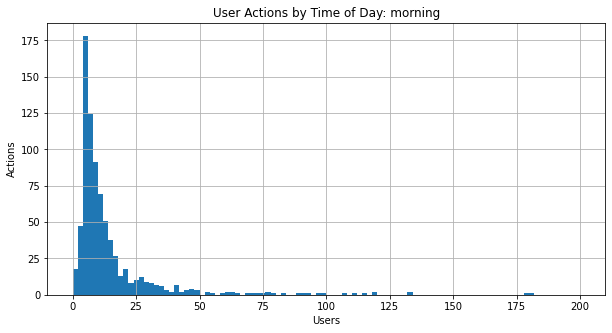

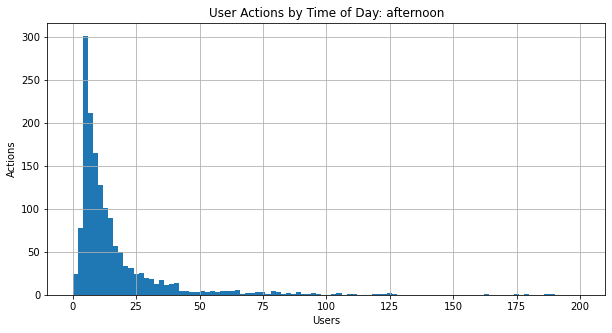

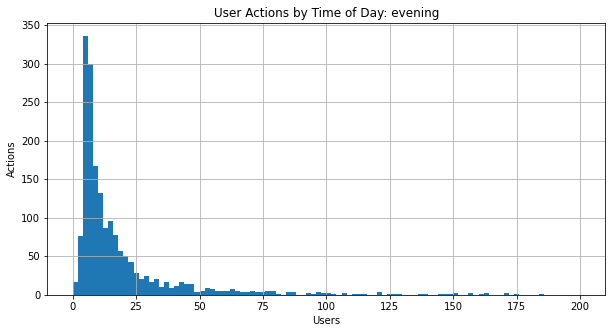

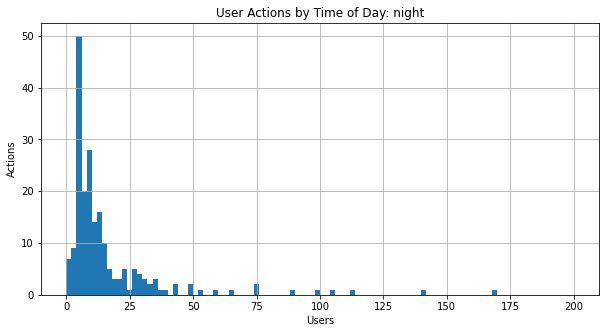

In [377]:
time_of_day_section = ['morning', 'afternoon', 'evening', 'night']

# iterate over different time of day sections and  plot histograms of event frequency for each time of day section
for i in time_of_day_section:
    # filter the mobile dataset based on the current time of day section
    time_of_day_data = mobile_dataset[mobile_dataset['time_of_day_section'] == i]
    
    # group the data by user_id and count the number of events for each user
    event_frequency = time_of_day_data.groupby('user_id')['event_name'].count().reset_index()
    
    # plot a histogram of event frequency with specified range and bins
    event_frequency.hist(range=(0,200), bins=100, figsize =(10,5))
    
    # set the title of the plot to reflect the current time of day section
    plt.title(f'User Actions by Time of Day: {i}')
    # set the labels for the x-axis and y-axis
    plt.xlabel('Users')
    plt.ylabel('Actions')
    plt.show()

### Which user segments have the best conversion rate

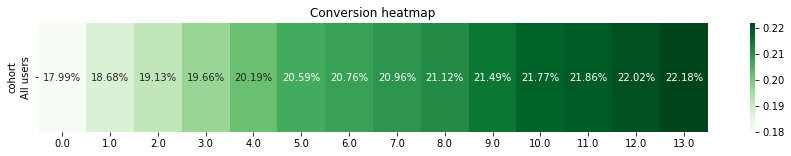

In [378]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, calls, datetime(2019, 11, 3).date(), 14)

plt.figure(figsize=(15, 2))
sns.heatmap(conversion.drop(columns=['cohort_size']), cmap='Greens', annot=True, fmt='.2%')
plt.title('Conversion heatmap')
plt.show() 

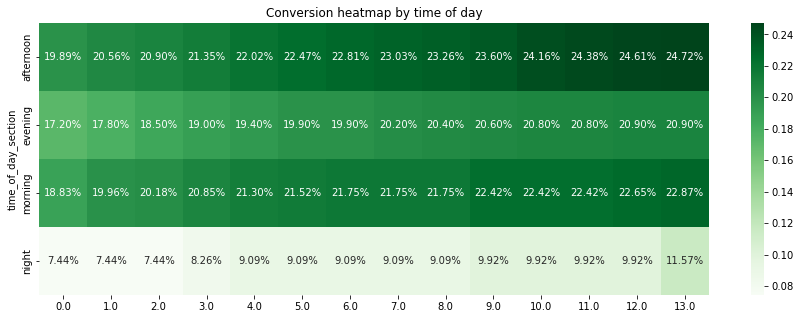

In [379]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, calls, datetime(2019, 11, 3).date(), 14, dimensions=['time_of_day_section'])

plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), cmap='Greens', annot=True, fmt='.2%')
plt.title('Conversion heatmap by time of day')
plt.show() 

At the end of the two-week period, users who access the application in the afternoon show higher conversion rates compared to those accessing it at other times of the day, with the lowest conversion rate observed among nighttime users.

In [380]:
def plot_conversion(conversion, conversion_history, horizon):

    # set the fig size for the plots
    plt.figure(figsize=(17, 5))

    # exclude cohort sizes from the conversion table
    conversion = conversion.drop(columns=['cohort_size'])
    # keep only the required lifetime in the conversion history table
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # conversion curves plot
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(color=colors, grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Conversion')


    plt.tight_layout()
    plt.show() 

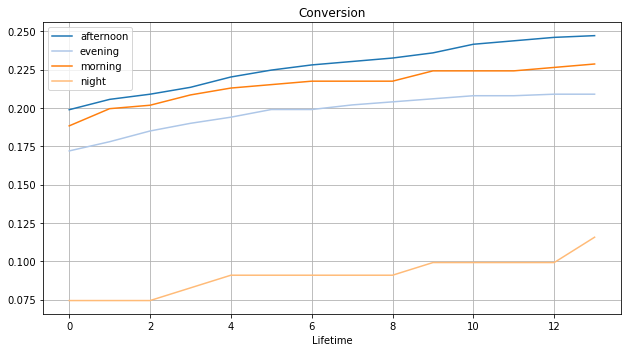

In [381]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, calls, datetime(2019, 11, 3).date(), 14, dimensions=['time_of_day_section'])
plot_conversion(conversion, conversion_history, 14) 

The significantly lower conversion rate among nighttime users suggests a notable deviation from other time periods. It is possible that nighttime users engage with the application for non-purchase-related purposes, such as entertainment, similar to scrolling through TikTok.

Afternoon and evening users of the application are the primary target audience. The majority of actions are performed in the evening (42.6%) and in the afternoon (36.7%), with evening users exhibiting a better retention rate. The highest conversion rate is observed among afternoon users. Additionally, the highest number of sessions occurs among users who access the application in the morning.

## Hypothesis testing

### Users from Yandex and Google demonstrate different conversion rates into contact views.

Alpha (statistical significance level) - 0.05.

Define hypothesis (Null and Alternate):

- Null Hypothesis (H0) - users from Yandex and Google do not demonstrate different conversion rates into contact views.
- Alternative Hypothesis (H1) - users from Yandex and Google demonstrate different conversion rates into contact views.

In [382]:
users_from_yandex = mobile_dataset.query('source == "yandex"')['user_id'].nunique()
users_from_yandex # number of unique users from yandex

1934

In [383]:
users_from_google = mobile_dataset.query('source == "google"')['user_id'].nunique()
users_from_google # number of unique users from google

1129

In [384]:
t_users_from_yandex = (
    mobile_dataset.query('source == "yandex" & event_name == "contacts_show"')['user_id'].nunique())
t_users_from_yandex # number of unique users from yandex who have performed the target action

478

In [385]:
t_users_from_google = (
    mobile_dataset.query('source == "google" & event_name == "contacts_show"')['user_id'].nunique())
t_users_from_google # number of unique users from google who have performed the target action

275

In [386]:
alpha = .05 # critical level of statistical significance

successes = np.array([t_users_from_yandex, t_users_from_google])
trials = np.array([users_from_yandex, users_from_google])

# success rate in the first group:
p1 = successes[0]/trials[0]

# success rate in the second group:
p2 = successes[1]/trials[1]

# success rate in the combined dataset:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# difference in proportions between the datasets
difference = p1 - p2 

# calculating the z-score statistic
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# defining the standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if p_value < alpha:
    print('Reject the null hypothesis: there is a significant difference between the proportions')
else:
    print('Do not reject the null hypothesis: there is no evidence to consider the proportions different')

p-value:  0.8244316027993777
Do not reject the null hypothesis: there is no evidence to consider the proportions different


In [387]:
round(p1 * 100,3)

24.716

In [388]:
round(p2 * 100,3)

24.358

**Conclusion:**

P-value > alpha, do not reject the null hypothesis.

There is no evidence to suggest that users who were acquired from Yandex and Google demonstrate different conversion rates into contact views. The conversion rate into contact views is independent of whether the user was acquired from Yandex or Google as the traffic source.

### Users who access the application in the afternoon perform more actions than those who access it in the evening.

Alpha (statistical significance level) - 0.05.

Define hypothesis (Null and Alternate):

- Null Hypothesis (H0) - users who access the application in the afternoon perform more actions than those who access it in the evening.
- Alternative Hypothesis (H1) - users who access the application in the afternoon do not perform more actions than those who access it in the evening.

In [389]:
# find users and the number of actions they perform im the afternoon
afternoon_users = (
    mobile_dataset.query('time_of_day_section == "afternoon"')
    .groupby('user_id')['event_time'].count().reset_index())
afternoon_users.head()

,user_id,event_time
0,00463033-5717-4bf1-91b4-09183923b9df,10
1,00551e79-152e-4441-9cf7-565d7eb04090,8
2,00554293-7e00-4122-b898-4e892c4a7c53,11
3,007d031d-5018-4e02-b7ee-72a30609173f,9
4,00a93a72-3bbc-4ee7-8a81-7134f45ae009,15


In [390]:
# find users and the number of actions they perform im the evening
evening_users = (
    mobile_dataset.query('time_of_day_section == "evening"')
    .groupby('user_id')['event_time'].count().reset_index())
evening_users.head()

,user_id,event_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,71
2,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32
3,006a32d4-ee10-40dc-b237-11e0fde81cbc,6
4,00753c79-ea81-4456-acd0-a47a23ca2fb9,18


In [391]:
alpha = 0.05 # level of statistical significance
# if the p-value is less than alpha, we reject the null hypothesis

results = st.ttest_ind(afternoon_users['event_time'], evening_users['event_time'], equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis: users who access the application in the afternoon do not perform more actions than those who access it in the evening.')
else:
    print('Do not reject the null hypothesis: there is no evidence to suggest that users perform more actions in the afternoon compared to the evening.')

p-value: 0.934653348336583
Do not reject the null hypothesis: there is no evidence to suggest that users perform more actions in the afternoon compared to the evening.


**Conclusion:**

P-value > alpha, do not reject the null hypothesis.
There is no evidence to suggest that users perform more actions during the day compared to the evening.

## Analysis Summary

**Exploratory Data Analysis:**

The dataset contains a total of 74,197 events with 4,293 unique users who perform on average 17 events. We observe that users typically perform fewer actions during the weekends.

On the second day, user's retention rate stands at 11% and dips to 6% by the seventh day.

We have established that the session length should be considered 30 minutes. If more than 30 minutes pass between user actions, we will consider the next action as a new session. On average, we observed almost a 24 hour gap between sessions. The median session duration from October 7 to November 3, 2019, was just 5 minutes. However, we recorded the longest session as over 5 hours, and 335 sessions were found to exceed an hour in duration. Notably, there were 2,088 zero-length sessions, implying that users probably opened the app and immediately exited. The median number of actions per session was 9, and again, fewer actions were typically performed on weekends.

We found that 22.2% of all users reached the target action — contact views — within a two-week span. Over the same period, Yandex had a conversion rate of 24.06%, slightly higher than Google's 22.44%. Other sources had a conversion rate of 18.9%. These other sources weren't as effective as the top two browsers. Peak conversion rates were recorded on October 9th (28.4%) and October 17th (27.1%), suggesting that promotions, bonuses, discounts, etc., may have been offered on these dates.

Regarding acquisition sources, users arrived:

- 45.1% from Yandex
- 26.3% from Google
- 28.7% from other sources

There was no discernible difference in contact view conversion between users arriving from Yandex or Google.

**Segmentation:**

We segmented the sessions based on the time of day: morning (6 AM to 11:59 AM), afternoon (12 PM to 3:59 PM), evening (4 PM to 11:59 PM), and night (12 AM to 5:59 AM).

Users who accessed the app in the evening showed higher 7th-day retention rates. Conversely, the lowest retention rate was noted among users who accessed the app at night.

As we approached the end of our analysis period, we noted that morning users tended to spend more time in the app than night users. At the start, most sessions originated from evening users. Evening users also executed the highest number of actions (42.6%), followed by afternoon (36.7%), morning (15.7%), and night users (5%). As we reached the end of the two-week period, daytime users showed a higher conversion rate compared to those using the app at other times. Night users showed the lowest conversion rate.

Based on the statistical test conducted, we found no compelling evidence suggesting that users performed more actions during the day versus the evening.

**Recommendations:**

The application's target segment primarily comprises users who access it in the afternoon and evening—accounting for 80% of all actions. However, the conversion rate for evening users was found to be slightly lower than that of morning users. Therefore, it would be most effective to dispatch push notifications about discounts, promotions, etc., during these hours. Nighttime users, who likely browse through the product feed for entertainment, have a conversion rate that's only half as effective as daytime users.